# Problem Set 7 - Matias Castro Tapia

In [14]:
import numpy as np 
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

# Problem 1

I loaded the 'random' points previously generated.

In [12]:
rp=open('rand_points.txt')
rpoints=np.array([(x.strip()).split(' ') for x in rp.readlines()],
                 dtype='float64')

I made 3D plots of the points for different view angles.

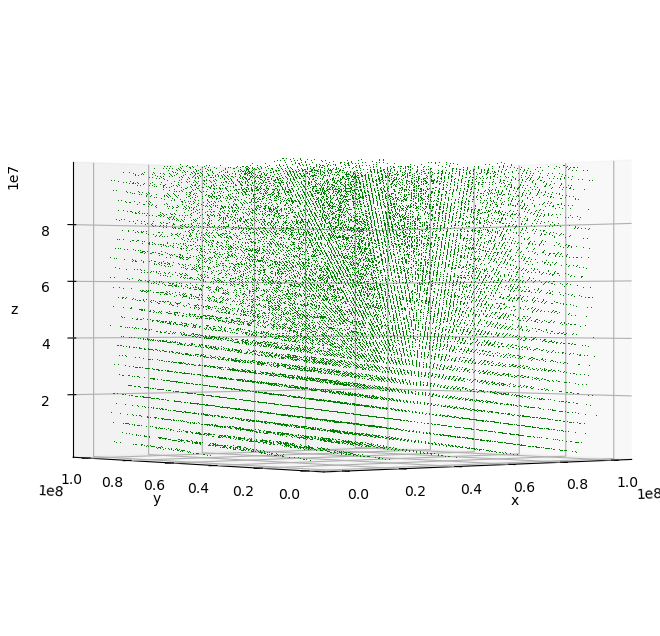

In [579]:
fig = plt.figure(figsize = (8, 8))
ax = plt.axes(projection = '3d')
ax.plot3D(rpoints[:,0], rpoints[:,1], rpoints[:,2],',', color='green')
plt.xlabel('x')
plt.ylabel('y')
ax.set_zlabel('z')
ax.view_init(0, 230)
plt.show()

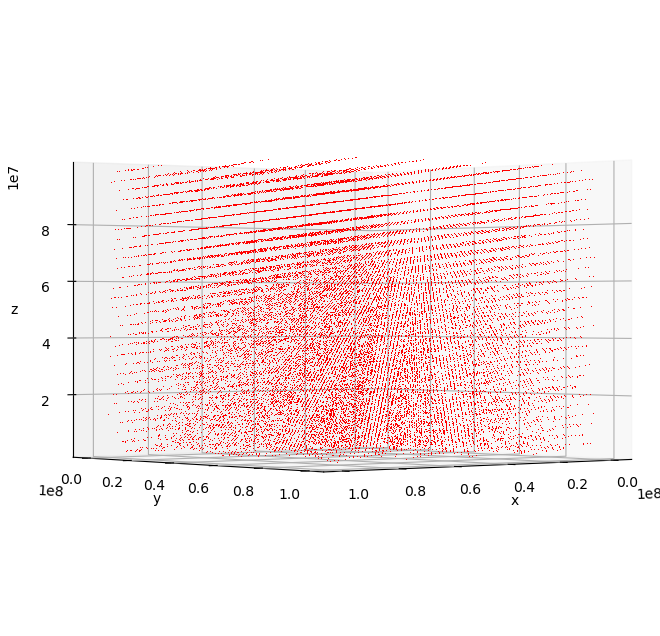

In [581]:
fig = plt.figure(figsize = (8, 8))
ax = plt.axes(projection = '3d')
ax.plot3D(rpoints[:,0], rpoints[:,1], rpoints[:,2],',', color='red')
plt.xlabel('x')
plt.ylabel('y')
ax.set_zlabel('z')
ax.view_init(0, 50)
plt.show()

We are able to see that the points lied in a set of planes. About 20 to 30 planes. We can note that they are planes because from some view angles the points form lines.

In [582]:
len(rpoints)

30253

Let's test the same using numpy.random.randint for integers between 0 and 1e8.

In [583]:
sampl = np.random.randint(low=0., high=1e8, size=(30253,3))

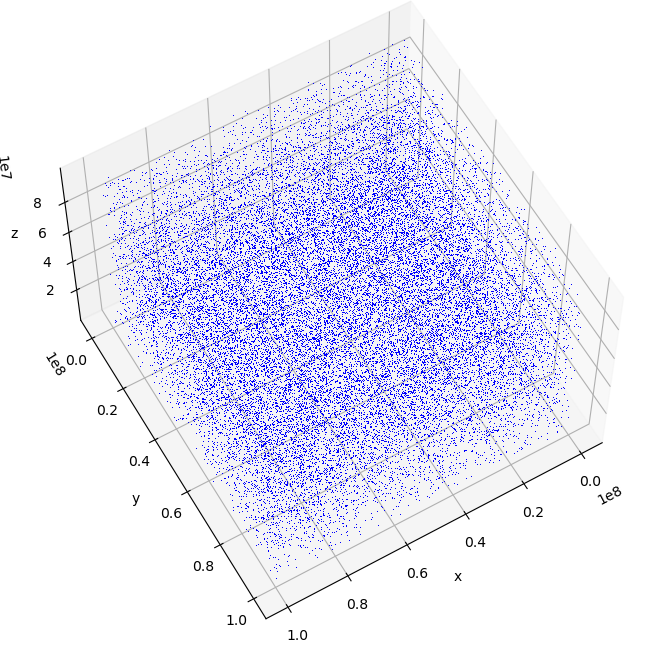

In [584]:
fig = plt.figure(figsize = (8, 8))
ax = plt.axes(projection = '3d')
ax.plot3D(sampl[:,0], sampl[:,1], sampl[:,2],',', color='blue')
plt.xlabel('x')
plt.ylabel('y')
ax.set_zlabel('z')
ax.view_init(60, 60)
plt.show()

After trying different view angles I was not able to see any relation among the points. We know that they are not random positions but they look more randomly distributed when comparing with the previous points. 

Finally, I used the random generator from C by myself.

In [585]:
import ctypes
import numba as nb
import time

mylib=ctypes.cdll.LoadLibrary("libc.dylib")
rand=mylib.rand
rand.argtypes=[]
rand.restype=ctypes.c_int


@nb.njit
def get_rands_nb(vals):
    n=len(vals)
    for i in range(n):
        vals[i]=rand()
    return vals

def get_rands(n):
    vec=np.empty(n,dtype='int32')
    get_rands_nb(vec)
    return vec


n=300000000
vec=get_rands(n*3)
#vv=vec&(2**16-1)

vv=np.reshape(vec,[n,3])
vmax=np.max(vv,axis=1)

maxval=1e8
vv2=vv[vmax<maxval,:]

f=open('rand_points1.txt','w')
for i in range(vv2.shape[0]):
    myline=repr(vv2[i,0])+' '+repr(vv2[i,1])+' '+ repr(vv2[i,2])+'\n'
    f.write(myline)
f.close()

In [586]:
rp1=open('rand_points1.txt')
rpoints1=np.array([(x.strip()).split(' ') for x in rp1.readlines()],
                 dtype='float64')

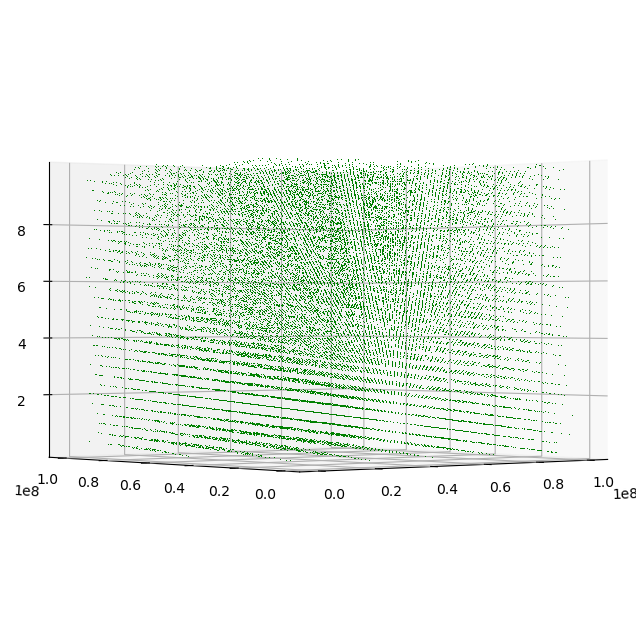

In [587]:
fig = plt.figure(figsize = (8, 8))
ax = plt.axes(projection = '3d')
ax.plot3D(rpoints1[:,0], rpoints1[:,1], rpoints1[:,2],',', color='green')
  
ax.view_init(0, 230)
  
plt.show()

Using some view angles we are able to see again that the points are distributed in a set of planes.

# Problem 2

Let's define de routine exp for having the exponential distribution $e^{-x}$

In [588]:
x=np.linspace(0.01,1,10000)
def exp(x):
    return np.exp(-x)

I also defined a very large number for generating the random samples.

In [479]:
N=10000000

Taking a gaussian $e^{-x^{2}/2}$. We can see that making a plot of the exponential distribution along with a the gaussian in the range 0 to 1, the gaussian is always larger.

In [597]:
def gauss(x):
    return np.exp(-0.5*(x**2))

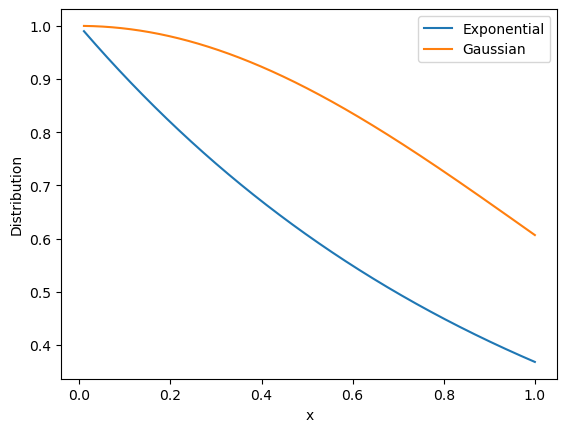

In [599]:
plt.plot(x,exp(x),label='Exponential')
plt.plot(x,gauss(x),label='Gaussian')
plt.xlabel('x')
plt.ylabel('Distribution')
plt.legend()

I defined the routine dev. I took random numbers from a normal distribution and random numbers from a uniform distribution and compared the ratio $\frac{e^{-x}}{e^{-x^{2}/2}f}$ for accept or reject a number from the random generated samples. I used $f$ to scale the distribution from what we want to generate the exponential distribution.

In [615]:
def dev(N,dist,distexp,f):
    rn=np.random.randn(N)
    p=np.random.rand(N)
    accept=p<distexp(rn)/(dist(rn)*f)
    exp_g=rn[accept]
    aa,bb=np.histogram(exp_g,np.linspace(0,1,20))
    b_cent=0.5*(bb[1:]+bb[:-1])
    pred=distexp(b_cent)
    pred=pred/pred.sum()
    aa=aa/aa.sum()
    xx=np.linspace(np.min(exp_g),np.max(exp_g),100)
    plt.bar(b_cent,aa,0.15,label='Deviates')
    plt.plot(b_cent,pred,color='orange',label='Expected exponential')
    plt.xlabel('x')
    plt.ylabel('Distribution')
    plt.legend()
    print('This generator is: '+str(100*len(exp_g)/(len(rn)))+' % efficient.')

The routine generates the plot for the histogram of the deviates, the expected distribution, and the efficiency of the method.

This generator is: 86.76774 % efficient.


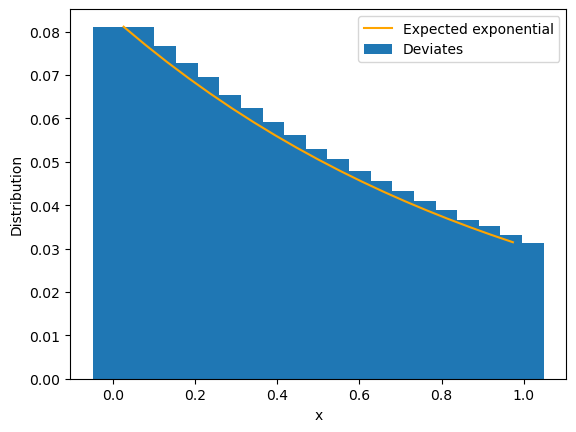

In [657]:
dev(N,gauss,exp,1)

Below, I made the same as before but changing the random numbers generated to be consistent with a lorentzian and a power law distribution. 

In [617]:
def rand_lorentz(n):
    x=np.random.rand(n)
    return np.tan(np.pi*(x-0.5))

In [618]:
def lorentz(x):
    return 1/(1+(x**2))    

In [622]:
def dev2(N,dist,distexp,f):
    rn=rand_lorentz(N)
    p=np.random.rand(N)
    accept=p<distexp(rn)/(dist(rn)*f)
    exp_g=rn[accept]
    aa,bb=np.histogram(exp_g,np.linspace(0,1,20))
    b_cent=0.5*(bb[1:]+bb[:-1])
    pred=distexp(b_cent)
    pred=pred/pred.sum()
    aa=aa/aa.sum()
    xx=np.linspace(np.min(exp_g),np.max(exp_g),100)
    plt.plot(b_cent,pred,color='orange')
    plt.bar(b_cent,aa,0.15,label='Deviates')
    plt.plot(b_cent,pred,color='orange',label='Expected exponential')
    plt.xlabel('x')
    plt.ylabel('Distribution')
    plt.legend()
    print('This generator is: '+str(100*len(exp_g)/len(rn))+' % efficient.')

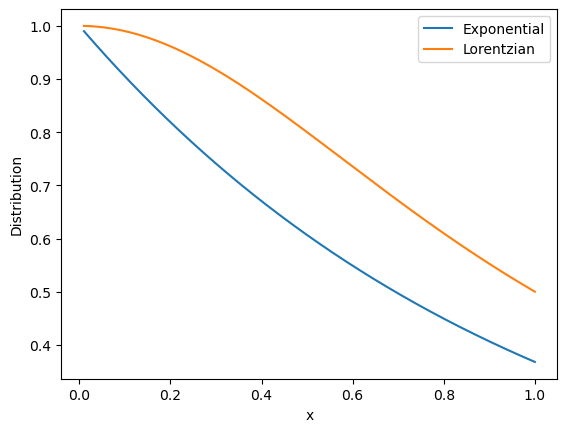

In [623]:
plt.plot(x,exp(x),label='Exponential')
plt.plot(x,lorentz(x),label='Lorentzian')
plt.xlabel('x')
plt.ylabel('Distribution')
plt.legend()

/var/folders/t6/3998tc3x2zscqp1ccvlgplk80000gn/T/ipykernel_18005/3588157509.py:3: RuntimeWarning: overflow encountered in exp
  return np.exp(-x)
/var/folders/t6/3998tc3x2zscqp1ccvlgplk80000gn/T/ipykernel_18005/2000361647.py:4: RuntimeWarning: overflow encountered in true_divide
  accept=p<distexp(rn)/(dist(rn)*f)


This generator is: 81.84239 % efficient.


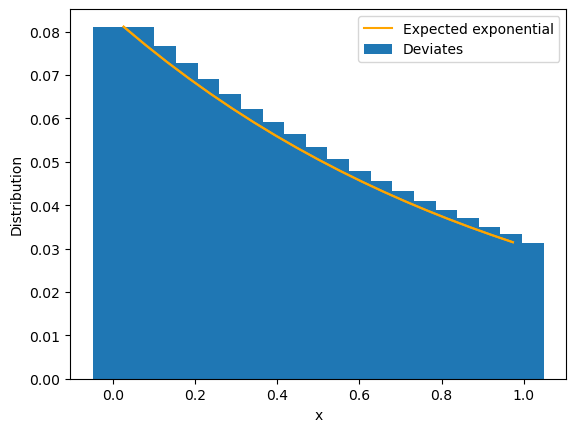

In [624]:
dev2(N,lorentz,exp,1.)

A good power law was $x^{-0.05}$. I determined the Gaussian, Lorentzian, and power law distribution based on if they were always above the exponential distribution when $x$ was between 0 and 1. I also tried different $f$ values to obtain an optimal efficiency.

In [636]:
def p_law(x):
    return x**(-0.05)

In [637]:
def rand_pow(n):
    alpha=0.05
    q=np.random.rand(n)
    t=(q)**(1/(1-alpha))
    return t

In [638]:
def dev3(N,dist,distexp,f):
    rn=rand_pow(N)
    p=np.random.rand(N)
    accept=p<distexp(rn)/(dist(rn)*f)
    exp_g=rn[accept]
    aa,bb=np.histogram(exp_g,np.linspace(0.01,1,20))
    b_cent=0.5*(bb[1:]+bb[:-1])
    pred=distexp(b_cent)
    pred=pred/pred.sum()
    aa=aa/aa.sum()
    xx=np.linspace(np.min(exp_g),np.max(exp_g),100)
    plt.bar(b_cent,aa,0.15,label='Deviates')
    plt.plot(b_cent,pred,color='orange',label='Expected exponential')
    plt.xlabel('x')
    plt.ylabel('Distribution')
    plt.legend()
    print('This generator is: '+str(100*len(exp_g)/len(rn))+' % efficient.')

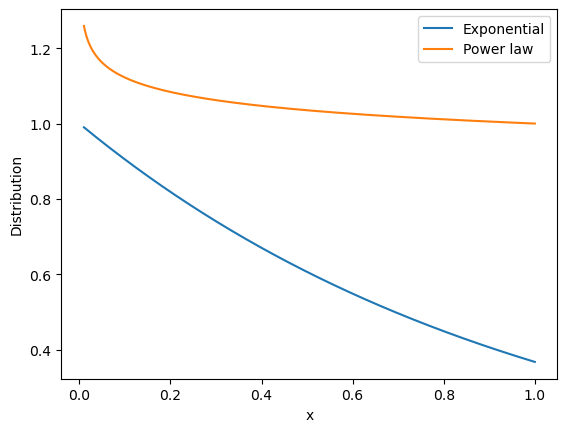

In [639]:
plt.plot(x,exp(x),label='Exponential')
plt.plot(x,p_law(x),label='Power law')
plt.xlabel('x')
plt.ylabel('Distribution')
plt.legend()

This generator is: 66.72372 % efficient.


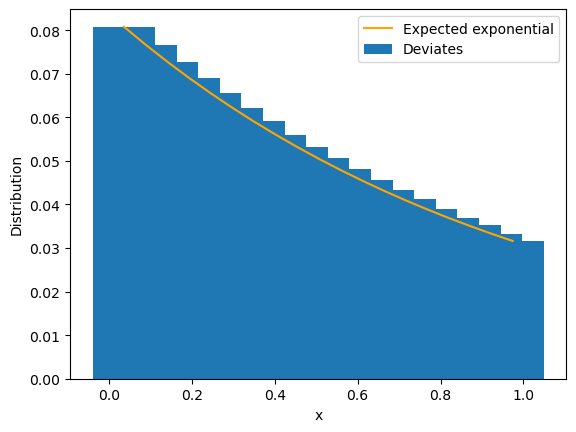

In [640]:
dev3(N,p_law,exp,0.9)

# Problem 3

I defined 10000 points between 0 and 1000 as $x_{s}$, and then I obtained the min and max values of $u$ and $v$ finding the min and max of $u=\sqrt{e^{-x_{s}}}$ and $v=x_{s}\sqrt{e^{-x_{s}}}$.

In [646]:
xs=np.linspace(0,1000,10000)

In [647]:
u=np.sqrt(exp(xs))
v=xs*np.sqrt(exp(xs))

In [648]:
umin=np.min(u)
umax=np.max(u)
vmin=np.min(v)
vmax=np.max(v)

The minimum and maximum values for $u$ and $v$.

In [650]:
umin,umax,vmin,vmax

(0.0, 1.0, 0.0, 0.7357588786635997)

I used the min and max values to define random numbers uniformly distributed and generate the exponential distribution using the ratio of uniforms.

In [566]:
urn=np.random.uniform(low=umin,high=umax,size=N)
vrn=np.random.uniform(low=vmin,high=vmax,size=N)

The ratio is $r=v_{unif}/u_{unif}$, and the accept condition is $u_{unif}<e^{-r}$.

In [567]:
r=vrn/urn
accept=urn<np.exp(-0.5*r)
newexp=r[accept]

Below, I reported made the histogram of the deviates with the expected distribution, and also reported the efficiency of the generator.

This generator is: 67.95068 % efficient.


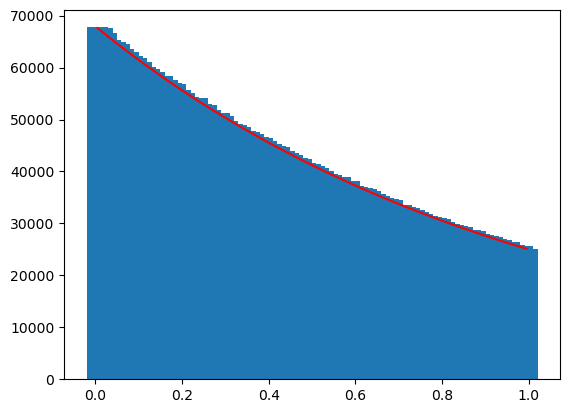

In [651]:
a,b=np.histogram(newexp,100,range=(0,1))
bb=0.5*(b[1:]+b[:-1])
pred=exp(bb)*np.sum(accept)*(bb[2]-bb[1])
plt.bar(bb,a,0.05)
plt.plot(bb,pred,'r')
print('This generator is: '+str(100*len(newexp)/len(r))+' % efficient.')